Submission 1 Membuat Model NLP dengan TensorFlow \\
Nama: Sari Nurbaiti \\
email: sarinurbaiti850@gmail.com\\
No Hp/WA : 085783778776

```
[# Ini diformat sebagai kode](https:// [teks link](https://))
```



In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
  -O /tmp/bbc-text.csv

--2021-07-22 07:41:04--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 74.125.137.128, 142.250.101.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.03s   

2021-07-22 07:41:04 (161 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [2]:
#Memulai prosessing data
import pandas as pd
df = pd.read_csv('/tmp/bbc-text.csv')

In [4]:
#Menampilkan 10 data teratas
df.head(10)

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [16]:
#Melihat 10 data terbawah
df.tail(10)

,category,text
2215,tech,junk e-mails on relentless rise spam traffic i...
2216,entertainment,top stars join us tsunami tv show brad pitt r...
2217,tech,rings of steel combat net attacks gambling is ...
2218,sport,davies favours gloucester future wales hooker ...
2219,business,beijingers fume over parking fees choking traf...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [5]:
#Melihat total data
df.shape

(2225, 2)

In [6]:
#Melihat jumlah data berdasarkan kategori
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

In [8]:
#Melihat informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [10]:
#Menghapus kolom yang tidak digunakan
category = pd.get_dummies(df.category)
df_br = pd.concat([df, category], axis=1)
df_br = df_br.drop(columns='category')
df_br

,text,business,entertainment,politics,sport,tech
0,tv future in the hands of viewers with home th...,0,0,0,0,1
1,worldcom boss left books alone former worldc...,1,0,0,0,0
2,tigers wary of farrell gamble leicester say ...,0,0,0,1,0
3,yeading face newcastle in fa cup premiership s...,0,0,0,1,0
4,ocean s twelve raids box office ocean s twelve...,0,1,0,0,0
...,...,...,...,...,...,...
2220,cars pull down us retail figures us retail sal...,1,0,0,0,0
2221,kilroy unveils immigration policy ex-chatshow ...,0,0,1,0,0
2222,rem announce new glasgow concert us band rem h...,0,1,0,0,0
2223,how political squabbles snowball it s become c...,0,0,1,0,0


In [19]:
#Mengubah nilai dataframe ke array
text = df_br['text'].values
label = df_br[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [24]:
#untuk melakukan split data
from sklearn.model_selection import train_test_split
text_train, text_test, label_train, label_test = train_test_split(text, label, test_size=0.2)

In [22]:
#untuk melakukan preprocessing dan layer
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

#untuk melakukan visualisasi plot
import matplotlib.pyplot as plt

In [25]:
#Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(text_train) 
tokenizer.fit_on_texts(text_test)

In [26]:
sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

In [27]:
padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [33]:
#Membuat model dari data
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 325       
Total params: 443,909
Trainable params: 443,909
Non-trainable params: 0
_________________________________________________________________


In [34]:
#Melakukan Callback 
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [35]:
#Model fit yang diperoleh adalah
num_epochs = 30
history = model.fit(padded_train, label_train, epochs=num_epochs, callbacks=[callbacks],
                    validation_data=(padded_test, label_test), verbose=2)

Epoch 1/30
56/56 - 301s - loss: 1.5922 - accuracy: 0.2742 - val_loss: 1.5131 - val_accuracy: 0.3371
Epoch 2/30
56/56 - 295s - loss: 1.1590 - accuracy: 0.4809 - val_loss: 0.9670 - val_accuracy: 0.5393
Epoch 3/30
56/56 - 293s - loss: 0.6113 - accuracy: 0.7517 - val_loss: 0.6621 - val_accuracy: 0.7506
Epoch 4/30
56/56 - 293s - loss: 0.3277 - accuracy: 0.8876 - val_loss: 0.9071 - val_accuracy: 0.6652
Epoch 5/30
56/56 - 289s - loss: 0.1582 - accuracy: 0.9528 - val_loss: 0.8918 - val_accuracy: 0.7416
Epoch 6/30
56/56 - 288s - loss: 0.0714 - accuracy: 0.9747 - val_loss: 0.8153 - val_accuracy: 0.8022
Epoch 7/30
56/56 - 290s - loss: 0.0391 - accuracy: 0.9882 - val_loss: 0.8558 - val_accuracy: 0.8112
Epoch 8/30
56/56 - 288s - loss: 0.0187 - accuracy: 0.9966 - val_loss: 0.9693 - val_accuracy: 0.8000
Epoch 9/30
56/56 - 287s - loss: 0.0125 - accuracy: 0.9972 - val_loss: 0.8645 - val_accuracy: 0.8315
Epoch 10/30
56/56 - 290s - loss: 0.1075 - accuracy: 0.9590 - val_loss: 1.0002 - val_accuracy: 0.7506

In [36]:
accuracy = history.history['accuracy']
epoch = range(len(accuracy))
validation_accuracy = history.history['val_accuracy']
loss = history.history['loss']
validation_loss = history.history['val_loss']

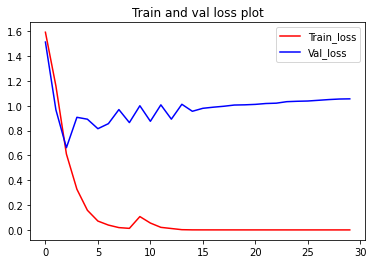

<Figure size 432x288 with 0 Axes>

In [37]:
#Membuat grafik untuk training dan validation loss
plt.plot(epoch, loss, 'r', label='Train_loss')
plt.plot(epoch, validation_loss, 'b', label='Val_loss')
plt.title('Train and val loss plot')
plt.legend(loc=0)
plt.figure()

plt.show()

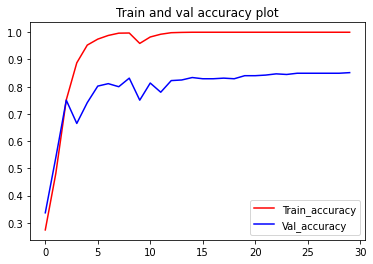

<Figure size 432x288 with 0 Axes>

In [38]:
#Membuat grafik untuk training dan validation accuracy
plt.plot(epoch, accuracy, 'r', label='Train_accuracy')
plt.plot(epoch, validation_accuracy, 'b', label='Val_accuracy')
plt.title('Train and val accuracy plot')
plt.legend(loc=0)
plt.figure()

plt.show()